In [1]:
# import libraries
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import inspect
import csv


import src.tuning as t
import pickle

# access parent directory from notebooks directory
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

%load_ext autoreload
%autoreload 2
%matplotlib inline
%reload_ext autoreload

# Peer Nomination Network Data (Social Facilitation)


In [2]:
# Instantiate grid search tuning class
tuning =  t.GridSearch()

/Users/davidblok/Work EUR/GitHub/ABM-PA/src/tuning.py:19: DtypeWarning: Columns (319,321,323,377,434,436,439,441,444,446,449,451,454,456,459,461,464,466,469,471,474,476,479,481,484,486,489,491) have mixed types.Specify dtype option on import or set low_memory=False.
  self.nominationPopulation = p.PeerNominatedDataPopulation('Peer-Nomination data population', self.input_args)
/Users/davidblok/Work EUR/GitHub/ABM-PA/src/tuning.py:114: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  super(GridSearch, self).__init__()
/Users/davidblok/Work EUR/GitHub/ABM-PA/src/tuning.py:20: DtypeWarning: Columns (319,321,323,377,434,436,439,441,444,446,449,451,454,456,459,461,464,466,469,471,474,476,479,481,484,486,489,491) have mixed types.Specify dtype option on import or set low_memory=False.
  self.communicationPopulation = p.CommunicationDataPopulation('Communication data population', self.input_args)
/Users/davidblok/Work EUR/GitHub/ABM-PA/src/t


## 1. Grid search: crude (400 parameter combinations)

In [3]:
# specify parameter space for grid search
i_seq = np.array([0.001, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1])
t_seq = np.array([0.001, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1])


### 1.1. Run grid search simulations

In [4]:
result_error, result_errorY3, result_m_error,\
result_child, result_cl = tuning.execute(t_range=t_seq,
                                         i_range=i_seq,
                                         t=2000,
                                         population_name='nomination_social')

# Save model output
file = open('../output/tuning/nom_soc_output_error_1.obj', 'wb')
pickle.dump(result_error, file)

file = open('../output/tuning/nom_soc_output_errorY3_1.obj', 'wb')
pickle.dump(result_errorY3, file)

file = open('../output/tuning/nom_soc_output_m_error_1.obj', 'wb')
pickle.dump(result_m_error, file)

file = open('../output/tuning/nom_soc_output_child_1.obj', 'wb')
pickle.dump(result_child, file)

file = open('../output/tuning/nom_soc_output_cl_1.obj', 'wb')
pickle.dump(result_cl, file)

thres_PA: 0.001 I_PA: 0.001 error: 1.3339372823020428 1.0898606991923159 0.009013897199127714 runtime: 20.992959022521973
thres_PA: 0.001 I_PA: 0.05 error: 16.921886566114317 12.875777748491648 1.0277009681069367 runtime: 20.741082191467285
thres_PA: 0.001 I_PA: 0.1 error: 20.242990990217365 15.503067284025375 1.272094370039362 runtime: 20.375668048858643
thres_PA: 0.001 I_PA: 0.15 error: 21.486191925816755 16.4296825183008 1.374885494443976 runtime: 19.76500105857849
thres_PA: 0.001 I_PA: 0.2 error: 21.953066387865704 16.86083323469317 1.4159023937940076 runtime: 19.845263242721558
thres_PA: 0.001 I_PA: 0.25 error: 22.49776585696797 17.314912479936172 1.4402829821483734 runtime: 19.704421043395996
thres_PA: 0.001 I_PA: 0.3 error: 4.152752050609659e+89 4.152752050609659e+89 9.41667131657519e+86 runtime: 19.71276330947876
thres_PA: 0.001 I_PA: 0.35 error: 4.5953957702180074e+89 4.5953957702180074e+89 1.042039857192292e+87 runtime: 19.809386014938354
thres_PA: 0.001 I_PA: 0.4 error: 3.26

### 1.2 Sum of Squared Errors

Text(0.5, 105.0, 'I PA')

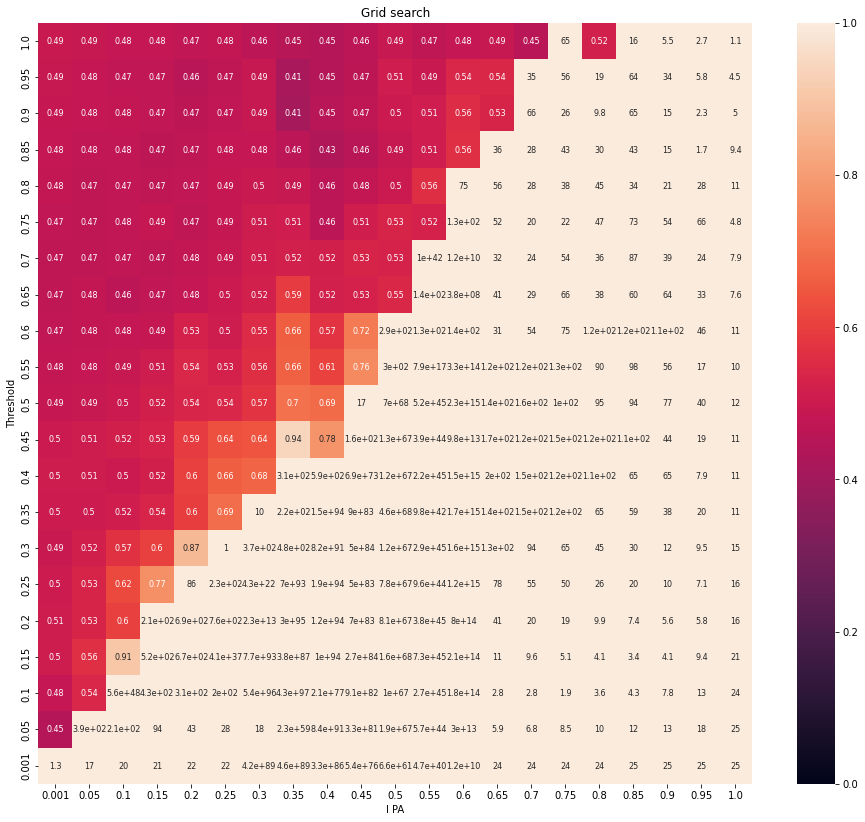

In [5]:
# SSE of all parameter combinations
errors_df = pd.DataFrame(result_error).pivot(index=0, columns=1,values=2)

# plot heatmap of grid search
plt.figure(figsize=((16,14)))
plt.title('Grid search')
sns.heatmap(errors_df, annot=True, annot_kws={"size": 8}, vmin=0, vmax=1).invert_yaxis()
plt.ylabel('Threshold')
plt.xlabel('I PA')

In [6]:
# Save plot
plt.savefig('../output/tuning/grid_search1_error_nomination_social.eps', bbox_inches='tight', format='eps', dpi=1000)


<Figure size 432x288 with 0 Axes>

### 1.3 Proportion participants changing PAL


In [7]:
# Checking proportion of participants changing PAL

proplist = []

for dat in result_child:
    datlist = []
    for key in dat:
        datlist.append(dat[key])

    res_ind = pd.concat(datlist, axis=1)
    dif = res_ind.iloc[1999] - res_ind.iloc[0]
    proplist.append(dif[dif != 0].count()/dif.count())

prop = pd.DataFrame(proplist)

result_prop = pd.DataFrame(result_error)

result_prop["prop"] = prop

prop_df = pd.DataFrame(result_prop).pivot(index=0, columns=1,values="prop")


Text(0.5, 105.0, 'I PA')

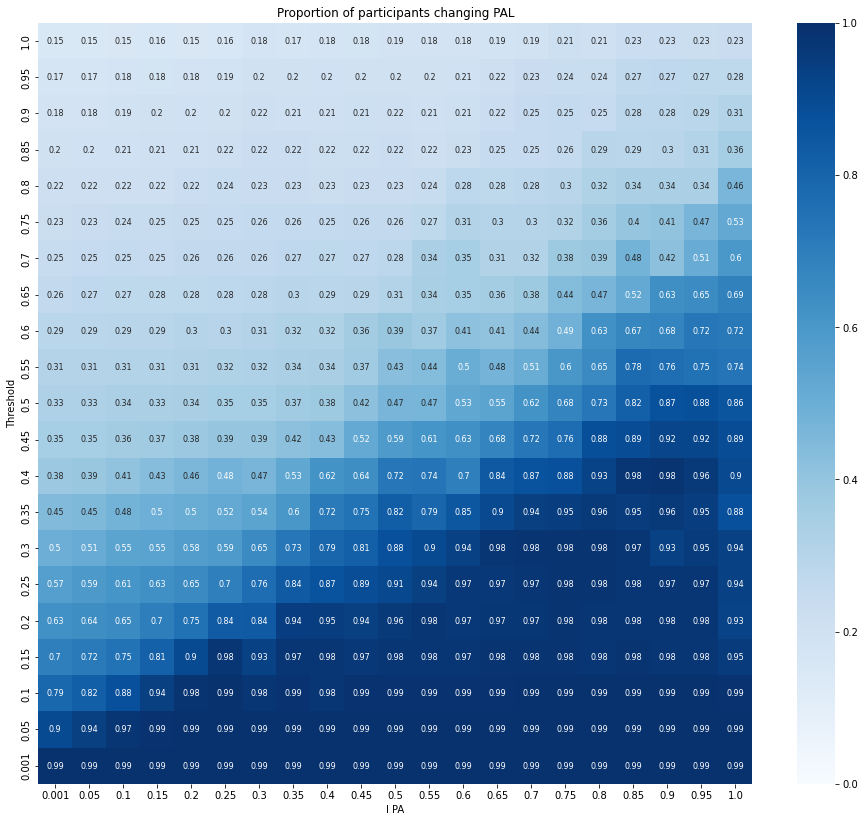

In [8]:
# plot heatmap of proportion changing PAL
plt.figure(figsize=((16,14)))
plt.title('Proportion of participants changing PAL')
sns.heatmap(prop_df, cmap="Blues", annot=True, annot_kws={"size": 8}, vmin=0, vmax=1).invert_yaxis()
plt.ylabel('Threshold')
plt.xlabel('I PA')


In [9]:
# Save plot
plt.savefig('../output/tuning/grid_search1_proportion_nomination_social.eps', bbox_inches='tight', format='eps', dpi=1000)


<Figure size 432x288 with 0 Axes>

# 2. Grid search: subspace

In [10]:
# specify parameter space for grid search
t_seq = np.arange(0.0025,0.101,0.0025)
i_seq = np.arange(0.0025,0.051,0.0025)


## 2.1 Run grid search simulations

In [11]:
result_error_2, result_errorY3_2, result_m_error_2,\
result_child2, result_cl2 = tuning.execute(t_range=t_seq,
                                           i_range=i_seq,
                                           t=2000,
                                           population_name='nomination_social')

# Save model output to object
file = open('../output/tuning/nom_soc_output_error_2.obj', 'wb')
pickle.dump(result_error_2, file)

file = open('../output/tuning/nom_soc_output_errorY3_2.obj', 'wb')
pickle.dump(result_errorY3_2, file)

file = open('../output/tuning/nom_soc_output_m_error_2.obj', 'wb')
pickle.dump(result_m_error_2, file)

file = open('../output/tuning/nom_soc_output_child_2.obj', 'wb')
pickle.dump(result_child2, file)

file = open('../output/tuning/nom_soc_output_cl_2.obj', 'wb')
pickle.dump(result_cl2, file)

thres_PA: 0.0025 I_PA: 0.0025 error: 0.91380249557675 0.6909798623222619 0.005914172760872091 runtime: 22.35947299003601
thres_PA: 0.0025 I_PA: 0.005 error: 217.90591229358262 183.7251852971406 9.933750771834195 runtime: 19.89318013191223
thres_PA: 0.0025 I_PA: 0.0075 error: 89.19601123266537 74.1191162606363 4.749446675488489 runtime: 20.503400087356567
thres_PA: 0.0025 I_PA: 0.01 error: 32.19653604502446 26.485279194184457 1.6100714306320754 runtime: 20.04560112953186
thres_PA: 0.0025 I_PA: 0.0125 error: 14.192634120458244 11.49177721299641 0.6166395719013515 runtime: 19.788411855697632
thres_PA: 0.0025 I_PA: 0.015000000000000001 error: 6.620750369456541 5.572130984337804 0.233396364138476 runtime: 19.85049319267273
thres_PA: 0.0025 I_PA: 0.017499999999999998 error: 2.7125837979239433 2.285875032232445 0.06582640765556706 runtime: 19.860610008239746
thres_PA: 0.0025 I_PA: 0.02 error: 1.846775229987489 1.40240589450929 0.0015406792104951242 runtime: 19.988377809524536
thres_PA: 0.0025

### 2.2 Results

In [12]:
# SSE of all parameter combinations
errors_df2 = pd.DataFrame(result_error_2).pivot(index=0, columns=1,values=2)
errors_df2

1,0.0025,0.0050,0.0075,0.0100,0.0125,0.0150,0.0175,0.0200,0.0225,0.0250,0.0275,0.0300,0.0325,0.0350,0.0375,0.0400,0.0425,0.0450,0.0475,0.0500
0,,,,,,,,,,,,,,,,,,,,
0.0025,0.913802,217.905912,89.196011,32.196536,14.192634,6.620750,2.712584,1.846775e+00,2.042228,2.245709,2.865279e+00,4.056555e+00,5.430143,6.019894e+00,6.852838,7.416177e+00,7.056575e+22,1.444376e+23,2.882784e+24,1.003729e+01
0.0050,0.747470,44.729845,201.194824,197.035416,161.778392,79.500396,43.586766,1.775732e+10,14.843781,13.726895,5.249805e+14,6.480876e+00,4.290410,5.396393e+00,3.002195,2.333664e+00,2.601392e+00,2.664970e+00,2.568745e+24,3.053964e+00
0.0075,0.655868,0.644107,0.916319,226.458939,236.319082,200.743512,150.093158,8.583405e+01,73.602604,48.732493,6.085522e+14,2.138358e+01,22.293685,3.732204e+18,11.356160,6.799383e+00,6.259616e+00,4.990302e+00,2.865108e+00,3.786765e+00
0.0100,0.624240,0.614700,0.589858,0.843977,364.892095,242.423460,209.472169,1.783788e+02,162.893701,106.604377,6.053924e+14,6.094015e+01,44.717121,4.052941e+01,24.219901,2.284270e+01,2.056209e+01,1.674960e+01,1.396632e+01,3.884583e+26
0.0125,0.582696,0.576731,0.576861,0.573754,121.272743,167.298834,301.157722,2.743717e+02,315.721493,195.483785,6.301229e+14,1.205554e+02,98.479666,8.196987e+01,52.925623,5.220155e+01,3.492002e+01,3.577433e+01,2.698848e+01,2.329015e+01
0.0150,0.553103,0.550474,0.542524,0.539683,0.528419,157.010910,255.184677,2.420082e+02,247.611373,251.983519,7.468908e+14,1.668778e+02,147.009528,1.307481e+02,107.952161,1.054752e+02,6.878329e+01,7.090611e+01,4.864792e+01,4.279049e+01
0.0175,0.531893,0.532252,0.533174,0.518233,0.531642,0.517294,65.511369,2.018210e+02,348.032747,365.872402,7.559450e+14,2.501649e+02,203.735848,5.681578e+18,161.112357,1.311138e+02,1.128477e+02,1.034638e+02,8.222251e+01,6.898895e+01
0.0200,0.515200,0.506853,0.518000,0.493324,0.523021,0.503106,0.509143,8.917560e+01,286.120416,366.477941,1.042033e+15,2.948440e+02,348.296287,2.902049e+02,206.744220,2.182092e+02,1.691058e+02,1.398639e+02,1.318601e+02,1.013907e+02
0.0225,0.491707,0.483266,0.493978,0.482891,0.478519,0.471663,0.494866,5.375660e-01,140.220884,206.319000,2.963172e+02,1.506821e+12,385.192588,6.944636e+18,277.629028,2.341822e+02,6.103936e+20,1.722780e+02,4.656527e+20,1.451348e+02


Text(0.5, 105.0, 'I PA')

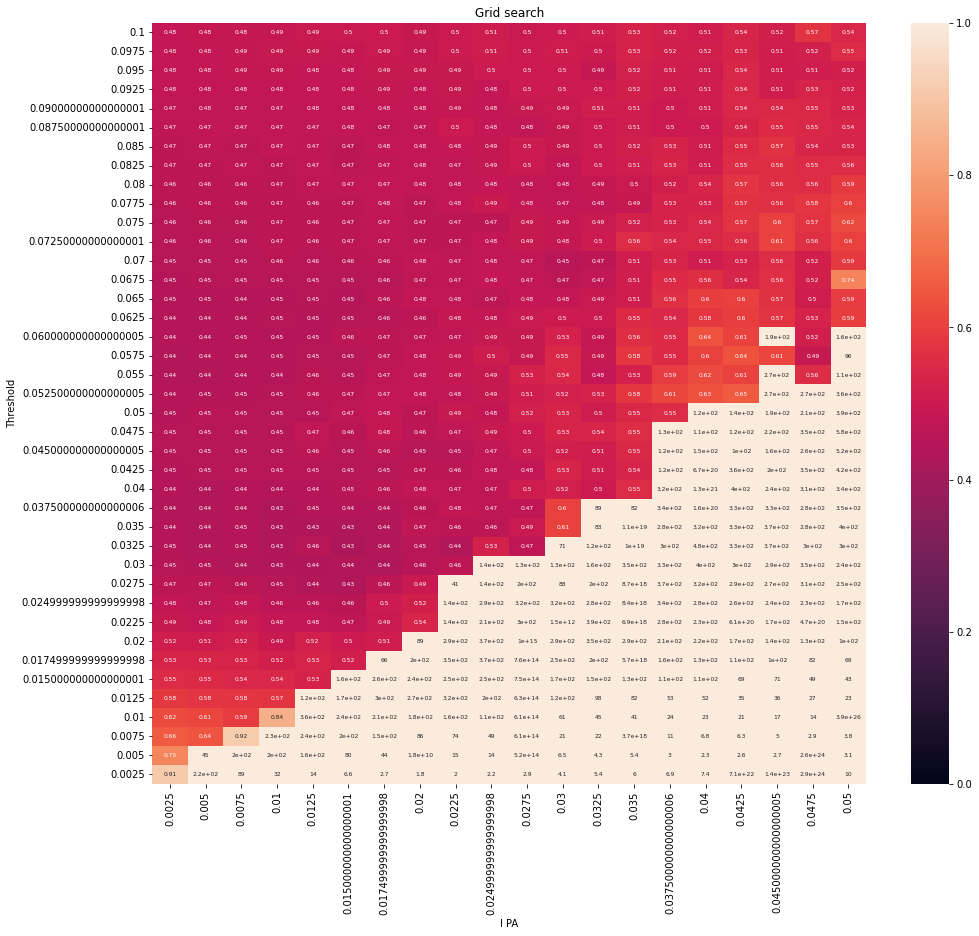

In [13]:
# plot heatmap of grid search
plt.figure(figsize=((16,14)))
plt.title('Grid search')
sns.heatmap(errors_df2, annot=True, annot_kws={"size": 6}, vmin=0, vmax=1).invert_yaxis()
plt.ylabel('Threshold')
plt.xlabel('I PA')

In [14]:
plt.savefig('../output/tuning/grid_search2_nomination_social.eps', bbox_inches='tight', format='eps', dpi=1000)


<Figure size 432x288 with 0 Axes>

## 3. Select best fitting parameter combinations

In [15]:
sort_errors = result_error_2

opt_pars = tuple(sort_errors)
opt_pars = sorted(opt_pars, key=lambda x:x[2])
# select top 100 parameter combinations
opt_pars  = opt_pars[0:100]

# Save parameter combinations in csv
with open('../output/opt_pars_nomination_social.csv','w') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['threshold','ipa', 'error'])
    for row in opt_pars:
        csv_out.writerow(row)

opt_pars

[(0.0325, 0.015000000000000001, 0.42833846084276744),
 (0.037500000000000006, 0.01, 0.43153147194011354),
 (0.035, 0.0125, 0.43162036077295307),
 (0.035, 0.015000000000000001, 0.4322672392151343),
 (0.0325, 0.01, 0.43278457976181794),
 (0.035, 0.01, 0.4335589628143771),
 (0.03, 0.01, 0.4343006418302404),
 (0.0275, 0.015000000000000001, 0.43434131356834227),
 (0.03, 0.0125, 0.43713522352867773),
 (0.03, 0.017499999999999998, 0.43716927292206953),
 (0.04, 0.005, 0.439132109412631),
 (0.035, 0.017499999999999998, 0.4397362691319401),
 (0.035, 0.005, 0.44015995711319506),
 (0.0325, 0.017499999999999998, 0.4403235184488137),
 (0.037500000000000006, 0.0025, 0.440395448922441),
 (0.055, 0.005, 0.440415033983786),
 (0.0325, 0.0225, 0.44049620814345986),
 (0.0325, 0.005, 0.4405923839403325),
 (0.03, 0.015000000000000001, 0.44068193946567774),
 (0.037500000000000006, 0.005, 0.4409799923994311),
 (0.0575, 0.0025, 0.4411206871995783),
 (0.0275, 0.0125, 0.4411464752901146),
 (0.03, 0.0075, 0.441286

In [16]:
# Run with optimal params
result_error_3, result_errorY3_3, result_m_error_3,\
result_child3, result_cl3 = tuning.execute_set(param_set=opt_pars,
                                              t=2000,
                                              population_name='nomination_social')

# Save model output to object
file = open('../output/tuning/nom_soc_output_error_3.obj', 'wb')
pickle.dump(result_error_3, file)

file = open('../output/tuning/nom_soc_output_errorY3_3.obj', 'wb')
pickle.dump(result_errorY3_3, file)

file = open('../output/tuning/nom_soc_output_m_error_3.obj', 'wb')
pickle.dump(result_m_error_3, file)

file = open('../output/tuning/nom_soc_output_child_3.obj', 'wb')
pickle.dump(result_child3, file)

file = open('../output/tuning/nom_soc_output_cl_3.obj', 'wb')
pickle.dump(result_cl3, file)

thres_PA: 0.0325 I_PA: 0.015000000000000001 error: 0.42833846084276744 0.31731334025368935 0.010777377335246075 runtime: 20.11099123954773
thres_PA: 0.037500000000000006 I_PA: 0.01 error: 0.43153147194011354 0.29465279683335044 0.010070728874361348 runtime: 19.231873035430908
thres_PA: 0.035 I_PA: 0.0125 error: 0.43162036077295307 0.30753103208432564 0.010099665141756886 runtime: 19.596598148345947
thres_PA: 0.035 I_PA: 0.015000000000000001 error: 0.4322672392151343 0.31557235890747015 0.011379899877846576 runtime: 19.330292224884033
thres_PA: 0.0325 I_PA: 0.01 error: 0.43278457976181794 0.3098236806686145 0.008790298551862209 runtime: 18.94622778892517
thres_PA: 0.035 I_PA: 0.01 error: 0.4335589628143771 0.2995976264660013 0.00914407728025725 runtime: 18.880516052246094
thres_PA: 0.03 I_PA: 0.01 error: 0.4343006418302404 0.3117960567786991 0.00807070159539392 runtime: 18.821375131607056
thres_PA: 0.0275 I_PA: 0.015000000000000001 error: 0.43434131356834227 0.32527278643678925 0.008835

### 3.1 Select best fitting parameter combinations (overall mean)


In [17]:
sort_errors = result_m_error_2

opt_pars = tuple(sort_errors)
opt_pars = sorted(opt_pars, key=lambda x:x[2])
# select top 100 parameter combinations
opt_pars  = opt_pars[0:100]

# Save parameter combinations in csv
with open('../output/opt_pars_m_nomination_social.csv','w') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['threshold','ipa', 'error'])
    for row in opt_pars:
        csv_out.writerow(row)

opt_pars

[(0.01, 0.0025, 5.889258242363318e-05),
 (0.0075, 0.005, 6.565055306564944e-05),
 (0.01, 0.005, 0.0001233702997355203),
 (0.0075, 0.0025, 0.0002238197721343798),
 (0.01, 0.0075, 0.0004312595783376138),
 (0.0125, 0.0025, 0.0004748690243412758),
 (0.005, 0.037500000000000006, 0.0006719882028411462),
 (0.0125, 0.005, 0.0008435763528782399),
 (0.0075, 0.0075, 0.000898416157329797),
 (0.015000000000000001, 0.0025, 0.0010531064796829432),
 (0.0125, 0.0075, 0.0013202085727625412),
 (0.015000000000000001, 0.005, 0.0013655101602050663),
 (0.005, 0.04, 0.0014624066894702546),
 (0.0025, 0.02, 0.0015406792104951242),
 (0.017499999999999998, 0.0025, 0.0016648546212212458),
 (0.005, 0.0025, 0.0017351275216990255),
 (0.015000000000000001, 0.0075, 0.001997448184356029),
 (0.017499999999999998, 0.005, 0.002089232051288166),
 (0.0125, 0.01, 0.002226156403805087),
 (0.02, 0.0025, 0.0024479687437363186),
 (0.02, 0.005, 0.0027636839604803162),
 (0.017499999999999998, 0.0075, 0.002885499237595854),
 (0.0150

In [18]:
# Run with optimal params
result_error_3, result_errorY3_3, result_m_error_3,\
result_child3, result_cl3 = tuning.execute_set(param_set=opt_pars,
                                              t=2000,
                                              population_name='nomination_social')

# Save model output to object
file = open('../output/tuning/nom_soc_output_error_3_1.obj', 'wb')
pickle.dump(result_error_3, file)

file = open('../output/tuning/nom_soc_output_errorY3_3_1.obj', 'wb')
pickle.dump(result_errorY3_3, file)

file = open('../output/tuning/nom_soc_output_m_error_3_1.obj', 'wb')
pickle.dump(result_m_error_3, file)

file = open('../output/tuning/nom_soc_output_child_3_1.obj', 'wb')
pickle.dump(result_child3, file)

file = open('../output/tuning/nom_soc_output_cl_3_1.obj', 'wb')
pickle.dump(result_cl3, file)

thres_PA: 0.01 I_PA: 0.0025 error: 0.6242396652340425 0.4355977431397818 5.889258242363318e-05 runtime: 19.084059238433838
thres_PA: 0.0075 I_PA: 0.005 error: 0.6441072612015519 0.4510065843898473 6.565055306564944e-05 runtime: 18.829758882522583
thres_PA: 0.01 I_PA: 0.005 error: 0.6147002712773331 0.43125806558859703 0.0001233702997355203 runtime: 18.710144996643066
thres_PA: 0.0075 I_PA: 0.0025 error: 0.6558678427849368 0.454050182770815 0.0002238197721343798 runtime: 18.710501194000244
thres_PA: 0.01 I_PA: 0.0075 error: 0.5898578068006799 0.41381899738261946 0.0004312595783376138 runtime: 19.190392017364502
thres_PA: 0.0125 I_PA: 0.0025 error: 0.5826964602919458 0.40298655247582704 0.0004748690243412758 runtime: 18.761007070541382
thres_PA: 0.005 I_PA: 0.037500000000000006 error: 3.002195164904953 2.3009575539195217 0.0006719882028411462 runtime: 19.11577296257019
thres_PA: 0.0125 I_PA: 0.005 error: 0.5767314762865239 0.4056748907396601 0.0008435763528782399 runtime: 18.788789033889

# Visualization of runs for checking

In [ ]:
# Read parameter combinations selected.
file = open('../output/tuning/nom_soc_output_error_2.obj', 'rb')
com_error2 = pickle.load(file)

opt_pars = tuple(com_error2)
opt_pars = sorted(opt_pars, key=lambda x:x[2])
# select top 100 parameter combinations
opt_pars  = opt_pars[0:100]
opt_pars


In [ ]:
opt_pars = []
opt_pars.append((0.001, 0.001))
opt_pars.append((0.002, 0.001))
opt_pars.append((0.003, 0.001))
opt_pars.append((0.004, 0.001))
opt_pars.append((0.005, 0.001))
opt_pars.append((0.006, 0.001))
opt_pars.append((0.007, 0.001))
opt_pars.append((0.008, 0.001))
opt_pars.append((0.009, 0.001))
opt_pars.append((0.010, 0.001))


result_error3, result_error3, result_error3, result_child3, result_cl3 = tuning.execute_set(param_set=opt_pars,
                                                                              t=2000,
                                                                            population_name='nomination_social')
by_run_nom = []
for run in range(len(opt_pars)):
    by_run_nom.append(pd.DataFrame(result_cl3[run]).mean(axis=1))

avg_nom = pd.concat(by_run_nom, axis=1)

avg_nom.plot(figsize=((15, 10)))